# Questoes

Qual é a média de avaliação (Rating) dos filmes de cada ano? Esta no dataset, porem variam de 6.3 a 6.7
Quais são os diretores que mais dirigiram filmes no período de 2003 a 2022? Ridley Scott com 13 filmes
Qual é a classificação (Certificate) predominante nos filmes deste período? Predominado por 'R'
Quais são os atores (Stars) mais bem avaliados em filmes deste período? Marsha Warren, Charlotte Labadie, David M Edelstien com medias de 9.6
Qual é o gênero (Genre) de filme mais popular nos últimos 10 anos (2012-2022)? Action com 634 seguido de Drama com 628
Em que países (Country_of_origin) os filmes deste período foram predominantemente produzidos? United States com 1784
Existe alguma correlação entre o orçamento (Budget) de produção do filme e sua arrecadação (Income)? Se sim, qual é essa correlação? comparando os 50 primeiros maiores lucro temos em media $7,810,000 de investimento e $192,943,000 media de rendimento, e sendo 377904% media de lucro, e a moda de investimento de $500,000
Qual foi o local com mais filmes gravado no periodo entra 2012 - 2022? Foi no USA com 906 filmes gravados, em segundo Canada com 209


BONUS = Os filmes com maiores media de lucro foram dos generos: Biography, Drama, Romance, Horror, Mystery
	Os filmes com maiores media de lucro foram da classificação: R, filmes adultos
	Os filmes com maiores media de lucro foram do ano de: 2018
	O diretor com filmes com mais media de lucro foi: Marcus H Rosenm ller
	O local que teve mais filmes com mais media de lucro foi: Northern Ireland
	A avaliação que teve mais media de lucro: 7.2
	Ator com mais media de lucro foi: David Kross


POREM ESTES DADOS ESTAO SENDO DESTACADOS POIS SAO TODOS DO MESMO FILME QUE POSSUI UM VALOR DE INVESTIMENTO PROVAVELMENTE INCORRETO, ENTAO REMOVENDO ELE TEMOS ESSES RESULTADOS:


BONUS = Os filmes com maiores media de lucro foram dos generos: Music, Horror, Mystery
	Os filmes com maiores media de lucro foram da classificação: R, filmes adultos ( Continua )
	Os filmes com maiores media de lucro foram do ano de: 2004
	O diretor com filmes com mais media de lucro foi: Chris Kentis
	O local gravado que teve mais filmes com mais media de lucro foi: Iran
	A avaliação que teve mais media de lucro: 8.5 seguido de 4.8
	Ator com mais media de lucro foi: Hugh Walsh com o filme Once de 2007 gravado na Ireland e com avaliação de filme de 7.8, sendo um filme de Drama, Music e Romance
	O tempo de filme com mais media de lucro é de: na casa dos 70 a 80 minutos, apice em 79

In [451]:
import pandas as pd
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [452]:
base = pd.read_csv('movies.csv')

In [453]:
base = base.drop(487)
base = base.drop(1557)

In [454]:
base.head()

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,8.0,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,"$350,000,000","$681,081,686",United States
1,Guillermo del Toro's Pinocchio,7.8,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,"$35,000,000","$71,614","United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,"$85,900,000","$239,268,602","Japan, United States"
3,The Banshees of Inisherin,8.0,2022,November,R,114,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","Comedy, Drama",Ireland,Unknown,"$19,720,823","Ireland, United Kingdom, United States"
4,M3gan,NaN,2022,January,PG-13,102,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,Unknown,Unknown,United States


In [455]:
avaliacao = base.dropna(subset=['Rating'])

In [456]:
avaliacao.groupby('Year')['Rating'].mean()

Year
2003    6.579000
2004    6.746000
2005    6.565000
2006    6.713000
2007    6.760606
2008    6.596000
2009    6.679000
2010    6.691000
2011    6.754000
2012    6.675000
2013    6.734000
2014    6.692000
2015    6.688000
2016    6.762000
2017    6.714000
2018    6.671717
2019    6.691000
2020    6.326000
2021    6.612000
2022    6.703061
Name: Rating, dtype: float64

In [457]:
base.Directors.value_counts()

Ridley Scott        13
Steven Spielberg    12
Antoine Fuqua       11
Shawn Levy          10
Clint Eastwood      10
                    ..
Noam Murro           1
Gary Shore           1
Dami n Szifron       1
Emerald Fennell      1
Chris Kentis         1
Name: Directors, Length: 1080, dtype: int64

In [458]:
genre =  copy.deepcopy(base)
genre['Genre'] = genre['Genre'].str.split(',')
genre = genre.explode('Genre')

In [459]:
base.Certificate.value_counts()

R            866
PG-13        714
PG           225
Not Rated     61
TV-MA         40
G             22
TV-14         12
TV-PG          9
NC-17          6
Unrated        6
TV-G           3
TV-Y7          1
Name: Certificate, dtype: int64

In [460]:
actor =  copy.deepcopy(base)
actor['Stars'] = actor['Stars'].str.split(',')
actor = actor.explode('Stars')
actor = actor.dropna(subset = ['Rating'])
actor.groupby('Stars')['Rating'].mean().sort_values(ascending=False)

Stars
 David M Edelstien    9.6
 Charlotte Labadie    9.6
 Marsha Warren        9.6
 Casey Cadag          9.0
 David Man            9.0
                     ... 
 Miryam Negrin        2.1
 Nicole Parker        1.9
Carmen Electra        1.9
 Vanessa Lachey       1.9
 Matt Lanter          1.9
Name: Rating, Length: 4070, dtype: float64

In [461]:
genre.Genre.value_counts()

Action        634
 Drama        627
Comedy        410
 Adventure    402
 Thriller     352
Drama         340
 Romance      280
 Comedy       272
 Mystery      220
 Sci-Fi       211
 Crime        206
 Fantasy      197
 Horror       157
Crime         126
 Family       124
Adventure     121
Animation     118
Biography     117
Horror        104
 History       57
 Music         44
 Sport         32
 War           22
 Action        22
 Biography     21
 Musical       20
Thriller       11
 Western       11
Mystery         7
Fantasy         5
Sci-Fi          2
Romance         2
Family          1
Name: Genre, dtype: int64

In [462]:
gravacao =  copy.deepcopy(base)
gravacao['Country_of_origin'] = gravacao['Country_of_origin'].str.split(',')
gravacao = gravacao.explode('Country_of_origin')
gravacao = gravacao.dropna(subset = ['Country_of_origin'])
gravacao['Country_of_origin'] = gravacao['Country_of_origin'].apply(lambda x: x.lstrip() if isinstance(x, str) else x)
gravacao
gravacao.Country_of_origin.value_counts()

United States     1783
United Kingdom     451
Canada             217
France             181
Germany            176
                  ... 
Portugal             1
Tunisia              1
Croatia              1
Qatar                1
Kenya                1
Name: Country_of_origin, Length: 63, dtype: int64

<AxesSubplot:>

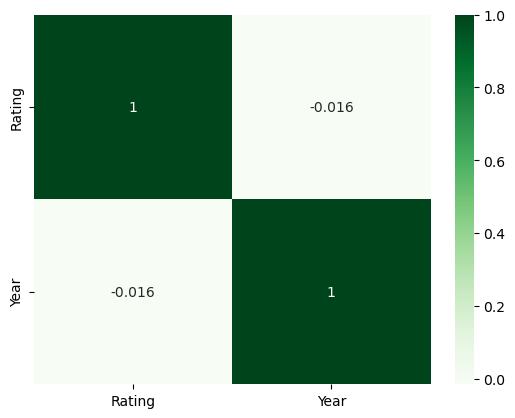

In [463]:
plt.figure()
sns.heatmap(base.corr(),annot=True,cmap ='Greens')

In [464]:
valor = copy.deepcopy(base)

In [465]:
valor = copy.deepcopy(base)
valor['Income'] = valor['Income'].replace('Unknown',0)
valor['Budget'] = valor['Budget'].replace('Unknown',0)
valor['Income'] = valor['Income'].str.replace('$','').str.replace(',','').astype(float)
valor['Budget'] = valor['Budget'].str.replace('$','').str.replace('CN','').str.replace('NOK','').str.replace(',','').str.replace('€','').str.replace('₹','').str.replace('CA','').str.replace('SEK','').str.replace('A','').str.replace('¥','').str.replace('DKK','').str.replace('£','').str.replace('₩','').astype(float)
# valor = valor.dropna(subset=['Income'])
# valor = valor.dropna(subset=['Budget'])
valor['Budget'] = valor['Budget'].fillna(0)
valor['Income'] = valor['Income'].fillna(0)





C:\Users\Isac\AppData\Local\Temp\ipykernel_7044\1702005295.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  valor['Income'] = valor['Income'].str.replace('$','').str.replace(',','').astype(float)
C:\Users\Isac\AppData\Local\Temp\ipykernel_7044\1702005295.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  valor['Budget'] = valor['Budget'].str.replace('$','').str.replace('CN','').str.replace('NOK','').str.replace(',','').str.replace('€','').str.replace('₹','').str.replace('CA','').str.replace('SEK','').str.replace('A','').str.replace('¥','').str.replace('DKK','').str.replace('£','').str.replace('₩','').astype(float)


In [466]:
base

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,8.0,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,"$350,000,000","$681,081,686",United States
1,Guillermo del Toro's Pinocchio,7.8,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,"$35,000,000","$71,614","United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,"$85,900,000","$239,268,602","Japan, United States"
3,The Banshees of Inisherin,8.0,2022,November,R,114,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","Comedy, Drama",Ireland,Unknown,"$19,720,823","Ireland, United Kingdom, United States"
4,M3gan,NaN,2022,January,PG-13,102,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,Unknown,Unknown,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,A Tale of Two Sisters,7.1,2003,June,R,114,Jee woon Kim,"Lim Soo jung, Yum Jung ah, Kim Kap su, Moon Ge...","Drama, Horror, Mystery",South Korea,Unknown,"$1,062,878",South Korea
1996,Lara Croft Tomb Raider: The Cradle of Life,5.5,2003,July,PG-13,117,Jan de Bont,"Angelina Jolie, Gerard Butler, Chris Barrie, C...","Action, Adventure, Fantasy",Greece,"$95,000,000","$160,099,222","United States, Germany, Japan, United Kingdom,..."
1997,Gothika,5.8,2003,November,R,98,Mathieu Kassovitz,"Halle Berry, Pen lope Cruz, Robert Downey Jr ,...","Horror, Mystery, Thriller",Canada,"$40,000,000","$141,591,324","United States, France, Canada, Spain"
1998,Ong-Bak: The Thai Warrior,7.1,2003,February,R,105,Prachya Pinkaew,"Tony Jaa, Phetthai Vongkumlao, Pumwaree Yodkam...","Action, Crime, Thriller",Thailand,Unknown,"$20,235,426","Thailand, France, Hong Kong"


In [467]:
resul_inc = valor['Income'].mean()
print(f'{resul_inc:,.2f}')

174,190,307.26


In [468]:
resul_bud = valor['Budget'].mean()
print(f'{resul_bud:,.2f}')

72,464,194.49


<AxesSubplot:>

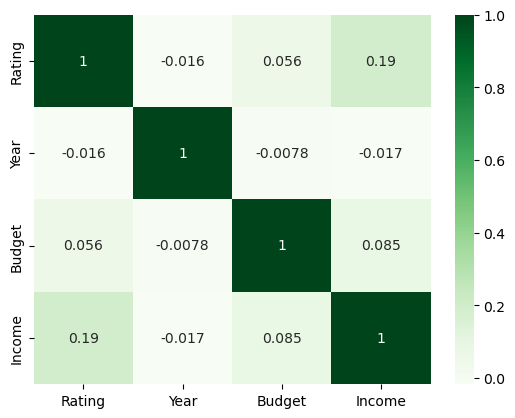

In [469]:
plt.figure()
sns.heatmap(valor.corr(),annot=True,cmap ='Greens')

In [470]:
base[['Budget','Income']].sort_values('Budget',ascending=False)

,Budget,Income
1316,"₹550,000,000","$60,262,836"
75,"₹3,500,000,000","$102,973,162"
1106,"€9,500,000","$426,588,510"
986,"€9,200,000","$24,930,592"
444,"€8,700,000","$3,081,913"
...,...,...
1792,"$1,000,000","$30,894,796"
1233,"$1,000,000","$15,440,333"
832,"$1,000,000","$21,947,454"
1280,"$1,000,000","$28,491"


In [471]:
valor['Budget'] = valor['Budget'].round(2)


In [472]:
a=0
lista=[]
aux=[]
for x in base['Budget']:
    if a == 487:
        a+=1
    if a == 1557:
        a+=1
    if base.Budget.str.contains('$')[a] == True:
        valor['Budget'][a] = valor['Budget'][a]/1000
        valor['Income'][a] = valor['Income'][a]/1000
        b = (valor['Income'][a]/valor['Budget'][a])*100
#         b =  f'{b:.2f}%'
        b = b.round(2)
        c = base['Income'][a]
        lista.append(b)
        print(f'{x} -------> {c} --------> {b}')
    
    else:
        aux.append(x)
    a+=1
    

C:\Users\Isac\AppData\Local\Temp\ipykernel_7044\4067213588.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valor['Budget'][a] = valor['Budget'][a]/1000
C:\Users\Isac\AppData\Local\Temp\ipykernel_7044\4067213588.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valor['Income'][a] = valor['Income'][a]/1000
C:\Users\Isac\AppData\Local\Temp\ipykernel_7044\4067213588.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  b = (valor['Income'][a]/valor['Budget'][a])*100
C:\Users\Isac\AppData\Local\Temp\ipykernel_7044\4067213588.py:12: RuntimeWarning: invalid value encountered in double_scalars
  b = (va

$350,000,000 -------> $681,081,686 --------> 194.59
$35,000,000 -------> $71,614 --------> 0.2
$85,900,000 -------> $239,268,602 --------> 278.54
Unknown -------> $19,720,823 --------> inf
Unknown -------> Unknown --------> nan
$120,000,000 -------> Unknown --------> 0.0
$80,000,000 -------> $31,245,810 --------> 39.06
$20,000,000 -------> $59,595,460 --------> 297.98
Unknown -------> $1,858,238 --------> inf
$40,000,000 -------> $9,500,361 --------> 23.75
$35,000,000 -------> $65,878,071 --------> 188.22
$78,000,000 -------> $1,470 --------> 0.0
$1,000,000 -------> $14,779,858 --------> 1477.99
$16,000,000 -------> $14,134,907 --------> 88.34
$195,000,000 -------> $391,273,355 --------> 200.65
$100,000,000 -------> Unknown --------> 0.0
Unknown -------> Unknown --------> nan
Unknown -------> Unknown --------> nan
Unknown -------> Unknown --------> nan
$250,000,000 -------> $791,852,924 --------> 316.74
$40,000,000 -------> $13,280,000 --------> 33.2
€10,000,000 -------> $17,211,145 --

$135,000,000 -------> $111,202,881 --------> 82.37
$33,000,000 -------> $44,331,465 --------> 134.34
$10,000,000 -------> Unknown --------> 0.0
$35,000,000 -------> Unknown --------> 0.0
$3,500,000 -------> $4,311,042 --------> 123.17
Unknown -------> $31,220,247 --------> inf
Unknown -------> $6,274,027 --------> inf
Unknown -------> $7,031,289 --------> inf
Unknown -------> $70,018 --------> inf
Unknown -------> Unknown --------> nan
$90,000,000 -------> $426,505,244 --------> 473.89
$5,300,000 -------> $2,000,541 --------> 37.75
$2,000,000 -------> $266,963 --------> 13.35
$14,000,000 -------> $1,351,662 --------> 9.65
Unknown -------> Unknown --------> nan
Unknown -------> $1,109,287 --------> inf
Unknown -------> $122,039 --------> inf
Unknown -------> $34,561 --------> inf
Unknown -------> Unknown --------> nan
Unknown -------> $916,042 --------> inf
Unknown -------> $453,210,959 --------> inf
Unknown -------> $17,424,378 --------> inf
Unknown -------> Unknown --------> nan
Unkno

$7,700,000 -------> $43,016,528 --------> 558.66
$43,000,000 -------> $35,164,920 --------> 81.78
Unknown -------> $5,643,957 --------> inf
Unknown -------> $23,148,937 --------> inf
$20,000,000 -------> Unknown --------> 0.0
$150,000,000 -------> $290,930,148 --------> 193.95
Unknown -------> Unknown --------> nan
$28,000,000 -------> $130,560,428 --------> 466.29
$150,000,000 -------> $267,770,708 --------> 178.51
$55,000,000 -------> $352,794,081 --------> 641.44
$4,500,000 -------> $255,745,157 --------> 5683.23
$160,000,000 -------> $1,305,611,599 --------> 816.01
€4,000,000 -------> $43,143,046 --------> 1078.58
$97,000,000 -------> $619,179,950 --------> 638.33
$217,000,000 -------> $605,425,157 --------> 279.0
$19,400,000 -------> $195,333,312 --------> 1006.87
$15,000,000 -------> $161,570,515 --------> 1077.14
Unknown -------> $9,501,021 --------> inf
$11,000,000 -------> $44,202,682 --------> 401.84
$35,000,000 -------> $701,842,551 --------> 2005.26
$100,000,000 -------> $5

Unknown -------> $368,372 --------> inf
€3,500,000 -------> $3,096,815 --------> 88.48
$38,000,000 -------> $109,906,372 --------> 289.23
$90,000,000 -------> $334,897,606 --------> 372.11
$7,000,000 -------> $3,073,700 --------> 43.91
$12,000,000 -------> $140,853,810 --------> 1173.78
$46,000,000 -------> $23,834,809 --------> 51.81
$140,000,000 -------> $150,680,864 --------> 107.63
$85,000,000 -------> $119,520,023 --------> 140.61
$60,000,000 -------> $162,146,076 --------> 270.24
$25,000,000 -------> $24,121,245 --------> 96.48
$135,000,000 -------> $245,623,848 --------> 181.94
$33,000,000 -------> $77,068,246 --------> 233.54
$175,000,000 -------> $966,554,929 --------> 552.32
$125,000,000 -------> $347,182,886 --------> 277.75
$38,000,000 -------> $112,343,513 --------> 295.64
$150,000,000 -------> $334,933,831 --------> 223.29
Unknown -------> $23,079,932 --------> inf
$1,000,000 -------> Unknown --------> 0.0
$35,000,000 -------> $27,979,040 --------> 79.94
$30,000,000 -----

Unknown -------> Unknown --------> nan
$17,000,000 -------> $72,835,710 --------> 428.45
$195,000,000 -------> $197,687,603 --------> 101.38
$15,000,000 -------> $146,428,180 --------> 976.19
$160,000,000 -------> $788,680,968 --------> 492.93
$50,000,000 -------> $173,649,931 --------> 347.3
$10,000,000 -------> $1,585,583 --------> 15.86
$215,000,000 -------> $493,311,825 --------> 229.45
$20,000,000 -------> $12,671,109 --------> 63.36
$50,000,000 -------> $226,349,749 --------> 452.7
$60,000,000 -------> $105,200,903 --------> 175.33
$25,000,000 -------> $71,009,334 --------> 284.04
$43,000,000 -------> $229,930,771 --------> 534.72
$18,000,000 -------> $99,104,804 --------> 550.58
$150,000,000 -------> $205,366,737 --------> 136.91
$175,000,000 -------> $151,783,839 --------> 86.73
$76,000,000 -------> $970,766,005 --------> 1277.32
$200,000,000 -------> $743,559,645 --------> 371.78
€9,200,000 -------> $24,930,592 --------> 270.98
$11,000,000 -------> $32,960,249 --------> 299.64

$20,000,000 -------> $67,876,281 --------> 339.38
$37,000,000 -------> $154,026,136 --------> 416.29
$100,000,000 -------> $170,458,922 --------> 170.46
$117,000,000 -------> $261,989,769 --------> 223.92
$80,000,000 -------> $271,457,301 --------> 339.32
Unknown -------> $844,281 --------> inf
$15,000,000 -------> $76,196,538 --------> 507.98
$125,000,000 -------> $493,214,993 --------> 394.57
€1,948,000 -------> $4,087,363 --------> 209.82
$30,000,000 -------> $102,820,008 --------> 342.73
$200,000,000 -------> $1,025,468,216 --------> 512.73
$200,000,000 -------> $623,933,331 --------> 311.97
$95,000,000 -------> $226,497,209 --------> 238.42
$58,000,000 -------> $199,006,387 --------> 343.11
$6,800,000 -------> $6,788,659 --------> 99.83
$38,000,000 -------> $252,276,927 --------> 663.89
$25,000,000 -------> $129,190,869 --------> 516.76
$2,000,000 -------> $1,278,650 --------> 63.93
$8,000,000 -------> $75,026,327 --------> 937.83
$170,000,000 -------> $400,063,852 --------> 235.3

$80,000,000 -------> $178,767,383 --------> 223.46
$40,000,000 -------> $106,407,672 --------> 266.02
$30,000,000 -------> $85,897,593 --------> 286.33
$17,500,000 -------> $150,988,382 --------> 862.79
$20,000,000 -------> $21,972,336 --------> 109.86
$55,000,000 -------> $128,792,411 --------> 234.17
$8,500,000 -------> $188,126 --------> 2.21
$60,000,000 -------> $255,743,093 --------> 426.24
$130,000,000 -------> $211,787,511 --------> 162.91
$80,000,000 -------> $212,874,864 --------> 266.09
£13,500,000 -------> $43,343,384 --------> 321.06
$85,000,000 -------> $340,487,836 --------> 400.57
$100,000,000 -------> $97,838,349 --------> 97.84
$25,000,000 -------> $171,627,434 --------> 686.51
$150,000,000 -------> $709,709,780 --------> 473.14
$20,000,000 -------> $170,812,526 --------> 854.06
$61,000,000 -------> $95,696,996 --------> 156.88
$150,000,000 -------> $942,235,757 --------> 628.16
$25,000,000 -------> $76,182,388 --------> 304.73
$70,000,000 -------> $137,515,140 -------

$20,000,000 -------> $37,598,767 --------> 187.99
£9,800,000 -------> $124,923,153 --------> 1274.73
$2,000,000 -------> $5,557,564 --------> 277.88
$15,000,000 -------> $21,156,270 --------> 141.04
Unknown -------> $3,200,383 --------> inf
$12,000,000 -------> $42,931,041 --------> 357.76
$27,000,000 -------> $56,308,881 --------> 208.55
$50,000,000 -------> $82,751,189 --------> 165.5
₩12,215,500,000 -------> $89,433,436 --------> 0.73
$75,000,000 -------> $141,861,243 --------> 189.15
$24,000,000 -------> $155,929,020 --------> 649.7
$5,000,000 -------> $26,986,174 --------> 539.72
$100,000,000 -------> $250,425,512 --------> 250.43
Unknown -------> $28,047,963 --------> inf
$135,000,000 -------> $163,794,509 --------> 121.33
$149,000,000 -------> $178,281,554 --------> 119.65
$30,000,000 -------> $53,653,224 --------> 178.84
$33,000,000 -------> $62,022,014 --------> 187.95
$18,000,000 -------> $68,844,775 --------> 382.47
$6,000,000 -------> $48,618,191 --------> 810.3
$160,000,00

In [473]:
base['Lucro'] =  lista
valor['Lucro'] =  lista

In [474]:
valor = valor.replace(np.inf,np.nan)
valor = valor.dropna(subset=['Lucro'])

In [475]:
valor = valor[valor['Lucro']>0]

In [476]:
media = valor[['Budget','Income','Lucro']].sort_values('Lucro',ascending=False).head(50)

In [477]:
media['Budget'].mean()

8529.74

In [478]:
media['Lucro'].mean()

3733.500799999999

In [479]:
media['Income'].mean()

201020.92867999998

In [480]:
media['Budget'].value_counts()

500.0      4
1000.0     3
3000.0     2
7000.0     2
4800.0     2
3500.0     2
15000.0    2
9000.0     2
5000.0     2
4000.0     2
2000.0     2
1500.0     2
30000.0    1
17000.0    1
35000.0    1
6200.0     1
55000.0    1
11400.0    1
10000.0    1
52000.0    1
14000.0    1
3400.0     1
150.0      1
13000.0    1
12000.0    1
400.0      1
7500.0     1
6500.0     1
9500.0     1
250.0      1
4500.0     1
7.0        1
880.0      1
1200.0     1
22000.0    1
Name: Budget, dtype: int64

In [481]:
base['Filming_location'][(base['Year']>2011) | (base['Year'] < 2023)].value_counts()

USA             905
Canada          209
UK              177
Unknown          76
Australia        44
               ... 
Norge             1
Space             1
Peru              1
Michigan USA      1
Ecuador           1
Name: Filming_location, Length: 96, dtype: int64

In [482]:
valor['Genre'][valor['Lucro']> 29480]

Series([], Name: Genre, dtype: object)

In [483]:

genre =  copy.deepcopy(base)
genre['Lucro'] = lista
genre['Genre'] = genre['Genre'].str.split(',')
genre = genre.explode('Genre')
genre = genre.replace(np.inf,np.nan)
genre = genre.dropna(subset=['Lucro'])
genre = genre.sort_values('Lucro',ascending=False)
genre['Genre'] = genre['Genre'].str.lstrip()

In [484]:
genre['Genre'][genre['Lucro']> 377904]

Series([], Name: Genre, dtype: object)

In [485]:
genre.groupby('Genre')['Lucro'].mean().sort_values()

Genre
Western      245.447500
War          288.433750
Action       297.989773
Crime        302.134464
History      306.372917
Fantasy      311.826919
Sport        317.550400
Musical      324.674667
Family       349.701765
Adventure    367.244114
Sci-Fi       377.746517
Animation    419.898058
Biography    422.077373
Comedy       425.900986
Drama        439.703053
Romance      480.996035
Thriller     556.698206
Mystery      663.937747
Horror       761.616505
Music        855.218421
Name: Lucro, dtype: float64

In [486]:
genre['Genre'].unique()

array(['Romance', 'Drama', 'Music', 'Comedy', 'Horror', 'Adventure',
       'Mystery', 'Thriller', 'Sci-Fi', 'Biography', 'History', 'Crime',
       'Action', 'Family', 'Animation', 'Fantasy', 'Musical', 'Sport',
       'Western', 'War'], dtype=object)

In [487]:
valor.groupby('Certificate')['Lucro'].mean()

Certificate
G            411.549524
NC-17        347.287500
Not Rated    305.234333
PG           431.912410
PG-13        427.992907
R            478.881931
TV-14         13.620000
TV-MA        234.582857
Unrated      117.840000
Name: Lucro, dtype: float64

In [488]:
valor.groupby('Year')['Lucro'].mean()

Year
2003    480.943548
2004    641.541020
2005    400.173723
2006    360.111630
2007    539.508046
2008    403.395521
2009    334.452473
2010    443.166154
2011    502.109130
2012    426.247263
2013    437.069468
2014    514.065056
2015    410.628276
2016    424.152967
2017    516.642338
2018    584.073200
2019    493.532027
2020    260.173125
2021    209.983200
2022    381.019130
Name: Lucro, dtype: float64

In [489]:
valor.groupby('Directors')['Lucro'].mean().sort_values(ascending=False)

Directors
Chris Kentis                          10936.700
Aneesh Chaganty                        8575.230
Shane Carruth                          7791.940
John Carney                            7504.795
Jared Hess                             5909.155
                                        ...    
Andrew Fleming                            0.250
Lin Manuel Miranda                        0.210
Guillermo del Toro, Mark Gustafson        0.200
Ben Ramsey                                0.090
John Glenn                                0.090
Name: Lucro, Length: 848, dtype: float64

In [490]:
valor[valor['Directors']=='Chris Kentis']

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin,Lucro
1999,Open Water,5.8,2003,August,R,79,Chris Kentis,"Blanchard Ryan, Daniel Travis, Saul Stein, Mic...","Adventure, Drama, Horror",Bahamas,500.0,54683.487,United States,10936.7


In [491]:
valor.groupby('Filming_location')['Lucro'].mean().sort_values()

Filming_location
Panama              91.170000
Ukraine             92.860000
Luxembourg          97.765000
California USA     105.230000
Uruguay            107.110000
                     ...     
Turkey             977.198889
Ireland           1470.761667
Lebanon           1610.430000
Bahamas           3678.383333
Iran              4585.220000
Name: Lucro, Length: 94, dtype: float64

In [492]:
valor.groupby('Rating')['Lucro'].mean().sort_values(ascending=False).head()

Rating
8.5    1501.638333
4.8    1177.458333
8.3     980.598750
8.4     885.002143
9.0     881.775000
Name: Lucro, dtype: float64

In [493]:
actor =  copy.deepcopy(base)
actor['Lucro'] = lista
actor = actor.replace(np.inf,np.nan)
actor = actor.dropna(subset=['Lucro'])
actor['Stars'] = actor['Stars'].str.split(',')
actor = actor.explode('Stars')
actor['Stars'] = actor['Stars'].str.lstrip()
actor.groupby('Stars')['Lucro'].mean().sort_values(ascending=False)


Stars
Hugh Walsh          13957.81
Mark ta Irglov      13957.81
Glen Hansard        13957.81
Gerard Hendrick     13957.81
Aaron Ruell         11534.72
                      ...   
Alexandra Holden        0.00
Ellen Crawford          0.00
Harry Melling           0.00
Charmaine Bingwa        0.00
Archie Yates            0.00
Name: Lucro, Length: 2852, dtype: float64

In [494]:
actor[actor['Stars']=='Hugh Walsh']

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin,Lucro
1583,Once,7.8,2007,June,R,86,John Carney,Hugh Walsh,"Drama, Music, Romance",Ireland,"$150,000","$20,936,722","Ireland, United States",13957.81


In [495]:
valor.groupby('Runtime')['Lucro'].mean().sort_values(ascending=False).head()

Runtime
79     5549.065000
77     4043.635000
78     2167.440000
86     1475.122857
201    1219.640000
Name: Lucro, dtype: float64